## Temperature

In [2]:
import xarray as xr
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)
data_tmax = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)
data_tmin = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)
data_rain = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)
data_hurs = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)
data_sun = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Sun\*.nc", parallel=True)
data_frost = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)
data_psl = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)
data_wind = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

projection_x_coordinate = np.array(data_temp['projection_x_coordinate'])
projection_y_coordinate = np.array(data_temp['projection_y_coordinate'])

scaler = MinMaxScaler()

# Normalize spatial coordinates
pyc = scaler.fit_transform(projection_y_coordinate.reshape(-1, 1))
pxc = scaler.fit_transform(projection_x_coordinate.reshape(-1, 1))


In [4]:
rain = np.array(data_rain['rainfall'])
hurs = np.array(data_hurs['hurs'])
temp = np.array(data_temp['tas'])
temp_max = np.array(data_tmax['tasmax'])
temp_min = np.array(data_tmin['tasmin'])
sun = np.array(data_sun['sun'])
frost = np.array(data_frost['groundfrost'])
psl = np.array(data_psl['psl'])
wind = np.array(data_wind['sfcWind'])

In [5]:
min_length = len(wind)
rain = rain[:min_length]
hurs = hurs[:min_length]
temp = temp[:min_length]
temp_max = temp_max[:min_length]
temp_min = temp_min[:min_length]
sun = sun[:min_length]
frost = frost[:min_length]
wind = wind[:min_length]
psl = psl[:min_length]

In [6]:
import numpy as np
import pandas as pd

# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [7]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [8]:
# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


C:\Users\iarla\AppData\Local\Temp\ipykernel_21580\2115229586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [9]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Filter rows based on the years of interest
rows_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

Data available for the specified years.


In [10]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)


In [11]:
y = df_filtered['Temp'].values

# Features
X = df_filtered.drop(['Temp', 'Temp_Min', 'Temp_Max'], axis=1).values

Mean Squared Error: 3.3427617322548517
R-squared Value: 0.8362265341520398


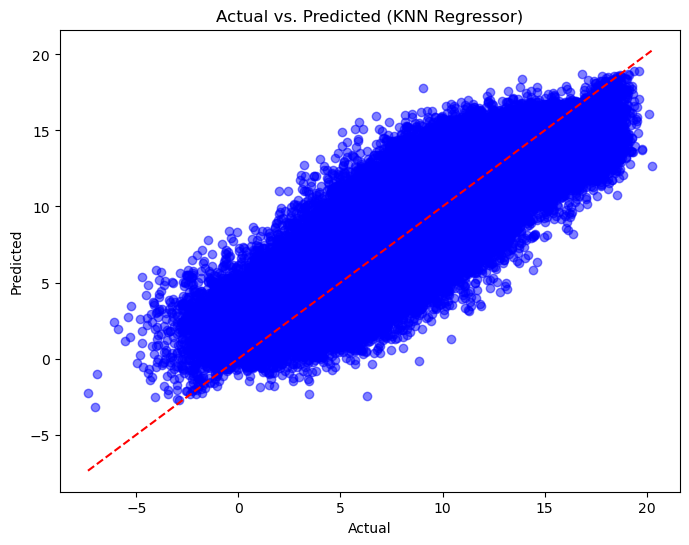

In [12]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the KNN Regression Model
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')  
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (KNN Regressor)') 
plt.show()

In [13]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Temp'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Temp','Temp_Min', 'Temp_Max'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = knn_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[3.9973043  5.35097843 6.09425323 ... 3.93176039 3.98371417 3.46152849]
(204610,)


In [14]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Temp': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Temp': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual Temp  Predicted Temp
0          7.066459        3.997304
1          7.171069        5.350978
2          6.388286        6.094253
3          6.395669        5.528662
4          6.753537        4.005500
...             ...             ...
204605     2.843987        3.521494
204606     2.971155        4.171730
204607     2.712619        3.931760
204608     3.238767        3.983714
204609     2.817050        3.461528

[204610 rows x 2 columns]


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.7947105460464269
Mean Absolute Error: 1.5937783271334234
Mean Squared Error: 4.197978648473042


In [ ]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Temp')
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')

# Regression line
sns.regplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Temp')
plt.ylabel('Residuals')

## Humidity

In [16]:
import numpy as np
import pandas as pd

# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [17]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [18]:
# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]

C:\Users\iarla\AppData\Local\Temp\ipykernel_21580\625150921.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [19]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Filter rows based on the years of interest
rows_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

Data available for the specified years.


In [20]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)

In [21]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Hurs'].values

# Features
X = df_filtered.drop(['Hurs'], axis=1).values

Mean Squared Error: 9.18334436457847
R-squared Value: 0.5512454366454147


Text(0.5, 1.0, 'Actual vs. Predicted (KNN Regressor)')

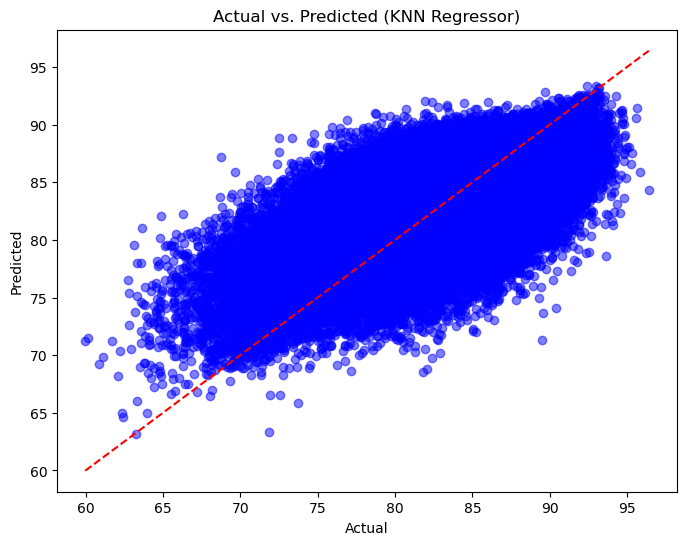

In [22]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the KNN Regression Model
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')  
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (KNN Regressor)') 

In [23]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Hurs'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Hurs'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = knn_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[84.70162426 84.84512623 88.77683003 ... 86.8004068  86.54365104
 86.961789  ]
(204610,)


In [24]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Hurs': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Hurs': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual Hurs  Predicted Hurs
0         87.820079       84.701624
1         88.151241       84.845126
2         88.152515       88.776830
3         88.056528       86.650407
4         87.619765       85.266705
...             ...             ...
204605    91.611267       87.047317
204606    83.109668       86.405301
204607    83.474671       86.800407
204608    83.641669       86.543651
204609    84.494217       86.961789

[204610 rows x 2 columns]


In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Hurs'], comparison_df['Predicted Hurs'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Hurs'], comparison_df['Predicted Hurs'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Hurs'], comparison_df['Predicted Hurs'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.44890087740520646
Mean Absolute Error: 2.6133825918870164
Mean Squared Error: 11.353390598128124


In [ ]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Hurs', y='Predicted Hurs', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Humidity')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')

# Regression line
sns.regplot(x='Actual Hurs', y='Predicted Hurs', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Hurs', y='Predicted Hurs', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Hurs')
plt.ylabel('Residuals')

## Rainfall

In [26]:
import numpy as np
import pandas as pd

# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})

In [27]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [28]:
# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


C:\Users\iarla\AppData\Local\Temp\ipykernel_21580\2115229586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [29]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Filter rows based on the years of interest
rows_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

Data available for the specified years.


In [30]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)

In [31]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Rain'].values

# Features
X = df_filtered.drop(['Rain'], axis=1).values

Mean Squared Error: 2136.064997254099
R-squared Value: 0.4098920593951395


Text(0.5, 1.0, 'Actual vs. Predicted (KNN Regressor)')

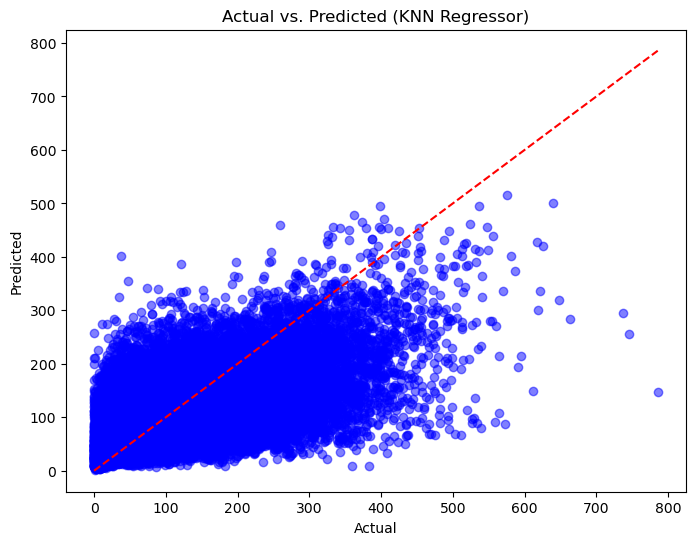

In [32]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the KNN Regression Model
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')  
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (KNN Regressor)') 

In [33]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Rain'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Rain'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = knn_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[ 66.80226292  85.57470084  93.60721385 ... 236.89219666 125.48612127
 244.35519084]
(204610,)


In [34]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Rain': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Rain': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual Rain  Predicted Rain
0         75.122752       66.802263
1         74.722797       85.574701
2         76.758510       93.607214
3         87.381053       84.546522
4         86.084085       61.011790
...             ...             ...
204605    58.625933       97.225664
204606    90.796143      118.433126
204607    82.877643      236.892197
204608    75.343349      125.486121
204609    89.424669      244.355191

[204610 rows x 2 columns]


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.1646154440142158
Mean Absolute Error: 39.16721721914751
Mean Squared Error: 3038.5728044694442


In [ ]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Rain')
plt.xlabel('Actual Rain')
plt.ylabel('Predicted Rain')

# Regression line
sns.regplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Rain')
plt.ylabel('Residuals')

## Wind

In [36]:
import numpy as np
import pandas as pd

# Create meshgrid for spatial coordinates
pyc_mesh, pxc_mesh = np.meshgrid(pyc.flatten(), pxc.flatten())

# Flatten the meshgrid arrays
pyc_flat = pyc_mesh.flatten()
pxc_flat = pxc_mesh.flatten()

# Repeat each spatial coordinate combination for the number of time values
num_time_values = len(rain)
pyc_flat = np.repeat(pyc_flat, num_time_values)
pxc_flat = np.repeat(pxc_flat, num_time_values)

# Flatten time arrays
rain_flat = rain.flatten()
hurs_flat = hurs.flatten()
temp_flat = temp.flatten()
temp_max_flat = temp_max.flatten()
temp_min_flat = temp_min.flatten()
sun_flat = sun.flatten()
frost_flat = frost.flatten()
psl_flat = psl.flatten()
wind_flat = wind.flatten()

# Create DataFrame
df = pd.DataFrame({
    'projection_y_coordinate': pyc_flat,
    'projection_x_coordinate': pxc_flat,
    'Rain': rain_flat,
    'Hurs': hurs_flat,
    'Temp': temp_flat,
    'Temp_Min': temp_min_flat,
    'Temp_Max': temp_max_flat,
    'Sun': sun_flat,
    'Frost': frost_flat,
    'Psl': psl_flat,
    'Wind': wind_flat
})


In [37]:
# List of columns to check for NaN values
columns_to_check = ['Rain', 'Hurs', 'Temp', 'Temp_Min', 'Temp_Max', 'Sun', 'Frost', 'Psl', 'Wind']

# Create a boolean mask indicating rows with NaN values in the specified columns
nan_mask = df[columns_to_check].isnull().any(axis=1)

# Filter the DataFrame to keep rows without NaN values in the specified columns
df_filtered = df[~nan_mask]

In [38]:
# Define the range of years
start_year = 1969
end_year = 2022

# Define the years you want to assign to each row
years = np.arange(start_year, end_year + 1)

# Repeat each year for each combination of spatial coordinate and time value once
num_combinations = len(df_filtered) 
years_repeated = np.tile(years, num_combinations)

# Add the year column to your DataFrame using .loc
df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


C:\Users\iarla\AppData\Local\Temp\ipykernel_21580\2115229586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Year'] = years_repeated[:len(df_filtered)]


In [39]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Filter rows based on the years of interest
rows_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)]

# Check if there are any rows in the filtered DataFrame
if not rows_of_interest.empty:
    print("Data available for the specified years.")
else:
    print("No data available for the specified years.")

Data available for the specified years.


In [40]:
# Define the years of interest
years_of_interest = range(2013, 2023)

# Find the indices of rows corresponding to the years of interest
indices_of_interest = df_filtered[df_filtered['Year'].isin(years_of_interest)].index

# Create a new DataFrame with the rows corresponding to the years of interest
new_df_filtered = df_filtered.loc[indices_of_interest].copy()

# Remove the filtered rows from the original DataFrame by creating a copy
df_filtered = df_filtered.drop(indices_of_interest)

In [41]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Wind'].values

# Features
X = df_filtered.drop(['Wind'], axis=1).values

Mean Squared Error: 1.538585361193771
R-squared Value: 0.32014328607380205


Text(0.5, 1.0, 'Actual vs. Predicted (KNN Regressor)')

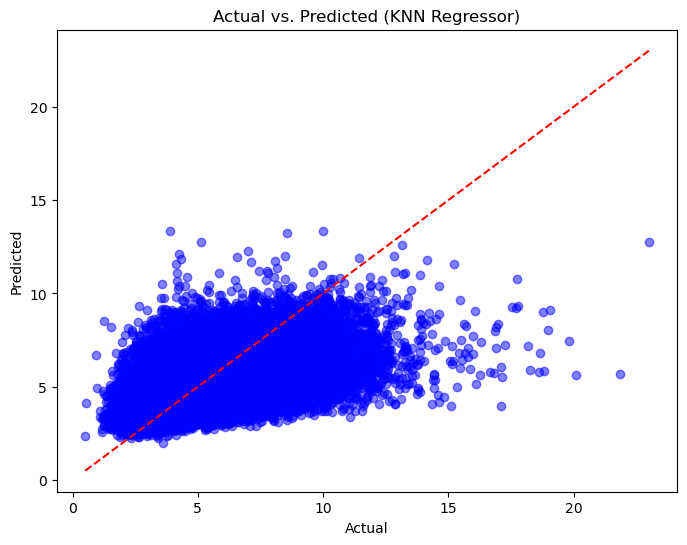

In [42]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the KNN Regression Model
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')  
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (KNN Regressor)') 

In [43]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Wind'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Wind'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = knn_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[4.62106176 3.77601709 5.21113184 ... 6.01413811 5.81121473 6.41216467]
(204610,)


In [44]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Wind': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Wind': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual Wind  Predicted Wind
0          5.792738        4.621062
1          6.466739        3.776017
2          6.913290        5.211132
3          6.015118        5.067764
4          5.273851        5.419463
...             ...             ...
204605     4.238288        4.116111
204606     6.312010        6.276989
204607     5.407377        6.014138
204608     5.545080        5.811215
204609     6.123321        6.412165

[204610 rows x 2 columns]


In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Wind'], comparison_df['Predicted Wind'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Wind'], comparison_df['Predicted Wind'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Wind'], comparison_df['Predicted Wind'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.1895488035202203
Mean Absolute Error: 0.9961926822167932
Mean Squared Error: 1.8575441309292025


In [ ]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Wind', y='Predicted Wind', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Wind')
plt.xlabel('Actual Wind')
plt.ylabel('Predicted Wind')

# Regression line
sns.regplot(x='Actual Wind', y='Predicted Wind', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Wind', y='Predicted Wind', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Wind')
plt.ylabel('Residuals')

## PSL

In [46]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Psl'].values

# Features
X = df_filtered.drop(['Psl'], axis=1).values

Mean Squared Error: 26.920179104790172
R-squared Value: 0.1814015321186263


Text(0.5, 1.0, 'Actual vs. Predicted (KNN Regressor)')

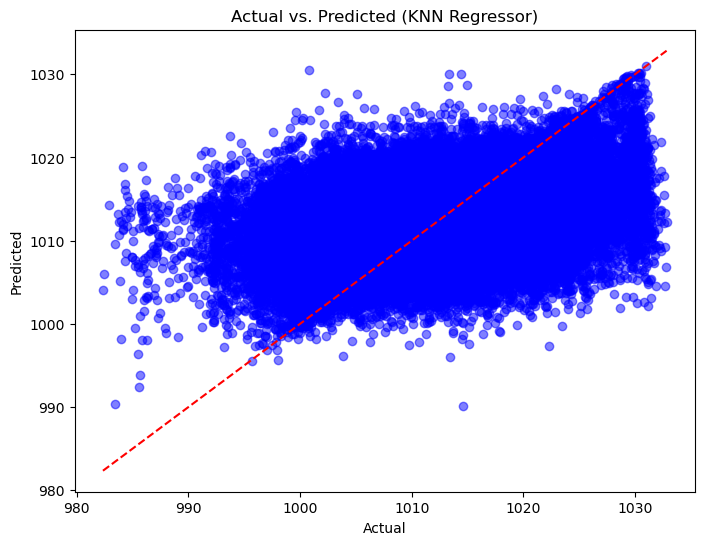

In [47]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the KNN Regression Model
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')  
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (KNN Regressor)') 

In [48]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Psl'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Psl'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = knn_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[1013.49485577 1013.47840311 1008.95404923 ... 1005.17255196 1010.91718503
 1012.34257361]
(204610,)


In [49]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Psl': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Psl': future_predictions
})

# Display the DataFrame
print(comparison_df)

         Actual Psl  Predicted Psl
0       1011.626903    1013.494856
1       1011.716412    1013.478403
2       1011.721162    1008.954049
3       1011.745675    1017.786163
4       1011.804720    1017.173264
...             ...            ...
204605  1005.820466    1011.645052
204606  1004.965121    1010.926754
204607  1004.987608    1005.172552
204608  1005.630589    1010.917185
204609  1005.626068    1012.342574

[204610 rows x 2 columns]


In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Psl'], comparison_df['Predicted Psl'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Psl'], comparison_df['Predicted Psl'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Psl'], comparison_df['Predicted Psl'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.033272662338842074
Mean Absolute Error: 4.204279413381876
Mean Squared Error: 31.897432155856475


In [ ]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Psl', y='Predicted Psl', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Psl')
plt.xlabel('Actual Psl')
plt.ylabel('Predicted Psl')

# Regression line
sns.regplot(x='Actual Psl', y='Predicted Psl', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Psl', y='Predicted Psl', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Psl')
plt.ylabel('Residuals')

## Sunshine

In [51]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Sun'].values

# Features
X = df_filtered.drop(['Sun'], axis=1).values

Mean Squared Error: 1045.5245630902389
R-squared Value: 0.7183584053728577


Text(0.5, 1.0, 'Actual vs. Predicted (KNN Regressor)')

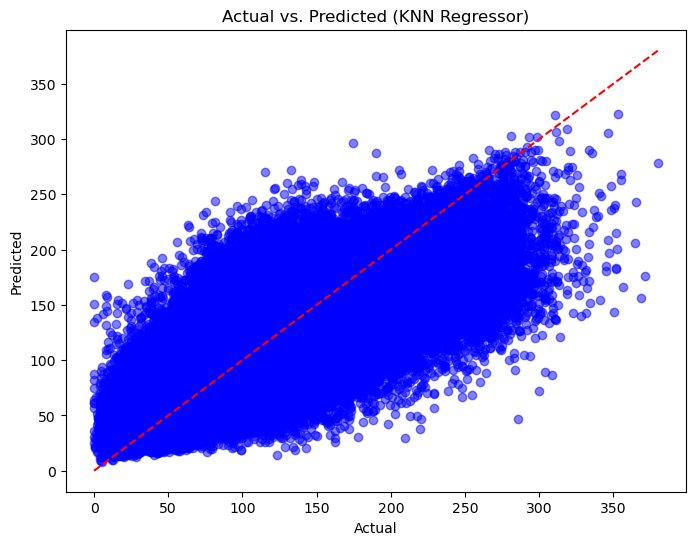

In [52]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the KNN Regression Model
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')  
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (KNN Regressor)') 

In [53]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Sun'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Sun'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = knn_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[54.30185703 71.58527286 57.79943584 ... 76.96382905 53.07605718
 70.51276379]
(204610,)


In [54]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Sun': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Sun': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual Sun  Predicted Sun
0        61.328209      54.301857
1        68.660224      71.585273
2        68.277069      57.799436
3        69.733919      52.686316
4        71.662597      44.696309
...            ...            ...
204605   28.193768      41.945001
204606   22.561367      61.676400
204607   20.168091      76.963829
204608   20.177609      53.076057
204609   22.934566      70.512764

[204610 rows x 2 columns]


In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Sun'], comparison_df['Predicted Sun'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Sun'], comparison_df['Predicted Sun'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Sun'], comparison_df['Predicted Sun'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.6429399382338293
Mean Absolute Error: 26.954330650837075
Mean Squared Error: 1322.4570329971764


In [ ]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Sun', y='Predicted Sun', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Sun')
plt.xlabel('Actual Sun')
plt.ylabel('Predicted Sun')

# Regression line
sns.regplot(x='Actual Sun', y='Predicted Sun', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Sun', y='Predicted Sun', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Sun')
plt.ylabel('Residuals')

## Frost

In [56]:
# Target variable (future temperatures over the entire grid)
y = df_filtered['Frost'].values

# Features
X = df_filtered.drop(['Frost'], axis=1).values

Mean Squared Error: 14.605533167633133
R-squared Value: 0.7704925676565385


Text(0.5, 1.0, 'Actual vs. Predicted (KNN Regressor)')

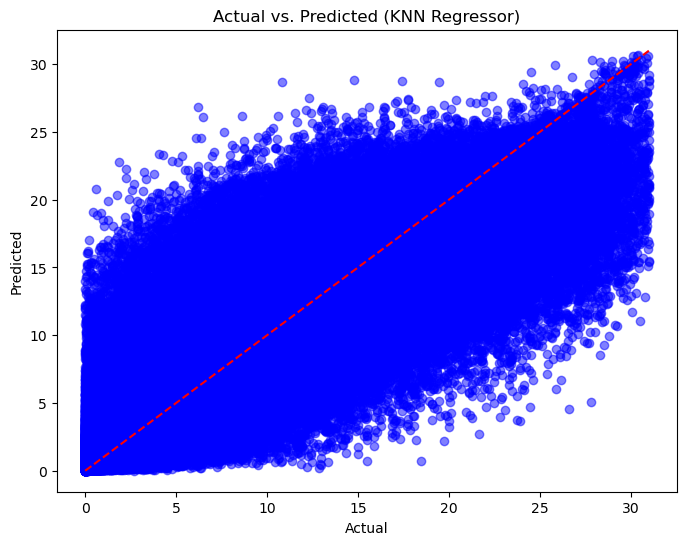

In [57]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the KNN Regression Model
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')  
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:", r_squared)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (KNN Regressor)') 

In [58]:
# Separate the temperature column before prediction
X_temp = new_df_filtered['Frost'].values.reshape(-1, 1)
X_new = new_df_filtered.drop(['Frost'], axis=1).values

# Assuming rf_model is your trained Random Forest model
future_predictions = knn_regressor.predict(X_new)

print(future_predictions)
print(future_predictions.shape)

[12.31155848 13.75538377 12.47293766 ... 17.27059352 16.00110715
 14.93688535]
(204610,)


In [59]:
# Assuming X_temp and future_predictions are NumPy arrays
comparison_df = pd.DataFrame({
    'Actual Frost': X_temp.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Frost': future_predictions
})

# Display the DataFrame
print(comparison_df)

        Actual Frost  Predicted Frost
0          15.754712        12.311558
1          13.303446        13.755384
2          15.631113        12.472938
3          17.834980         7.873588
4          17.885060         9.706163
...              ...              ...
204605     21.085514        13.894649
204606      8.794880        15.576719
204607     11.434160        17.270594
204608     10.612270        16.001107
204609     11.616522        14.936885

[204610 rows x 2 columns]


In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Frost'], comparison_df['Predicted Frost'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Frost'], comparison_df['Predicted Frost'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Frost'], comparison_df['Predicted Frost'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.7142490548233786
Mean Absolute Error: 3.0531961949333133
Mean Squared Error: 18.245304126751368


In [ ]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Frost', y='Predicted Frost', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Frost')
plt.xlabel('Actual Frost')
plt.ylabel('Predicted Frost')

# Regression line
sns.regplot(x='Actual Frost', y='Predicted Frost', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Frost', y='Predicted Frost', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Frost')
plt.ylabel('Residuals')